## Resume-Screening

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

In [4]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

## Exploring Categories

In [5]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [6]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

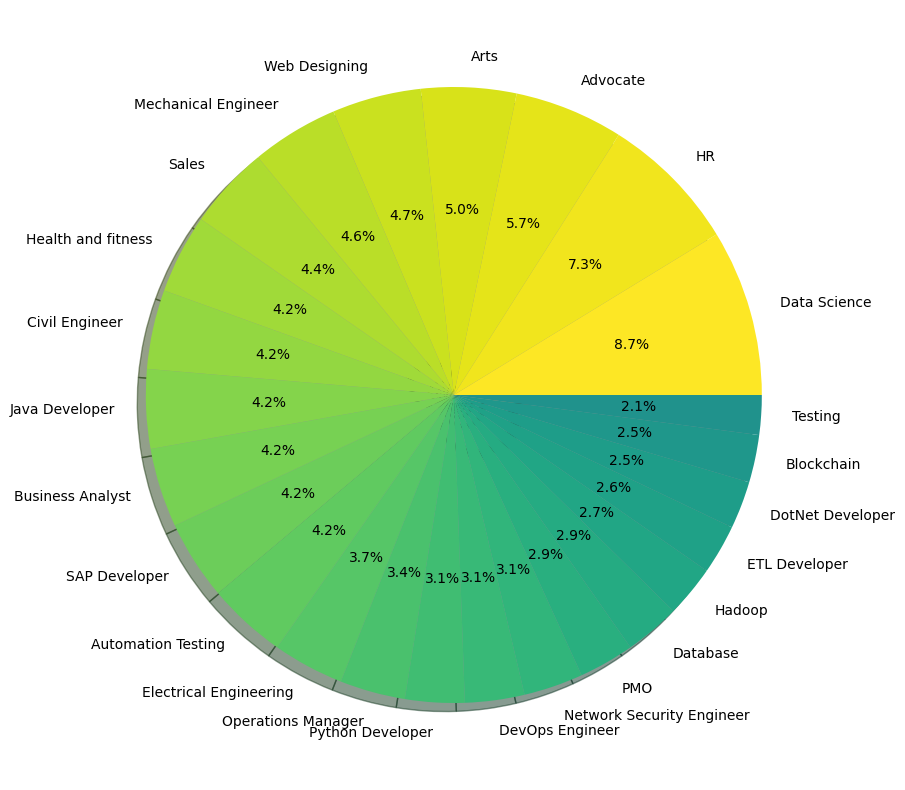

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
colors = plt.cm.viridis(np.linspace(1,0))  # Use 'viridis' colormap

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=colors)
plt.show()


## Balancing Category

In [8]:
print("Original Category Distribution:")
print(df['Category'].value_counts())

max_size = df['Category'].value_counts().max()

# oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

df = balanced_df.sample(frac=1).reset_index(drop=True)


Original Category Distribution:
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [9]:
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())


Balanced Category Distribution (After Oversampling):
Web Designing                84
Arts                         84
ETL Developer                84
Business Analyst             84
Electrical Engineering       84
Hadoop                       84
Automation Testing           84
Testing                      84
Civil Engineer               84
Mechanical Engineer          84
Operations Manager           84
DevOps Engineer              84
Java Developer               84
Blockchain                   84
Database                     84
HR                           84
Network Security Engineer    84
DotNet Developer             84
PMO                          84
Advocate                     84
Sales                        84
Health and fitness           84
Python Developer             84
Data Science                 84
SAP Developer                84
Name: Category, dtype: int64


## Data Cleaning

In [10]:
df.Resume[0]

"Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details \r\nJanuary 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering\r\nOctober 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board\r\n    College Magazine OCEAN\r\nWeb Designer \r\n\r\nWeb Designer - Trust Systems and Software\r\nSkill Details \r\nPHOTOSHOP- Exprience - 28 months\r\nBOOTSTRAP- Exprience - 6 months\r\nHTML5- Exprience - 6 months\r\nJAVASCRIPT- Exprience - 6 months\r\nCSS3- Exprience - Less than 1 year months\r\nAngular 4- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Trust Systems and Software\r\ndescription - Projects worked on:\r\n1. TrustBank-CBS\r\nProject Description: TrustBank-CBS is a core banking solution by Trust Systems.\r\nRoles and Responsibility:\r\nâ\x97\x8f Renovated complete UI to make it more modern, user-friendly, ma

#### Will remove all stop_Word , tags , \n , links etc using Rgular Expression

In [11]:
import re
def processing(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [12]:
processing(df.Resume[0])

'Technical Skills Web Technologies Angular JS HTML5 CSS3 SASS Bootstrap Jquery Javascript Software Brackets Visual Studio Photoshop Visual Studio Code Education Details January 2015 B E CSE Nagpur Maharashtra G H Raisoni College of Engineering October 2009 Photography Competition Click Nagpur Maharashtra Maharashtra State Board College Magazine OCEAN Web Designer Web Designer Trust Systems and Software Skill Details PHOTOSHOP Exprience 28 months BOOTSTRAP Exprience 6 months HTML5 Exprience 6 months JAVASCRIPT Exprience 6 months CSS3 Exprience Less than 1 year months Angular 4 Exprience Less than 1 year monthsCompany Details company Trust Systems and Software description Projects worked on 1 TrustBank CBS Project Description TrustBank CBS is a core banking solution by Trust Systems Roles and Responsibility Renovated complete UI to make it more modern user friendly maintainable and optimised for bank use Shared the UI structure and guidelines to be incorporated with development team of a

### Using spacy

In [13]:
# doc = nlp(df.Resume[0])  
# clean_tokens = []

# for token in doc:
#     if token.is_space or token.is_punct or token.is_stop:
#         clean_tokens.append(token)
#     if token.like_url or token.like_email or token.text.startswith('@') or token.text.startswith('#'):
#         clean_tokens.append(token)  #----> To know sapcy can be used

In [15]:
import spacy

nlp = spacy.load("en_core_web_sm")

def processing_spacy(txt):
    
    doc = nlp(txt)  
    clean_tokens = []
    for token in doc:
        if token.is_space or token.is_punct or token.is_stop:
            continue  
        if token.like_url or token.like_email or token.text.startswith('@') or token.text.startswith('#'):
            continue  
        
        clean_tokens.append(token.lemma_)  

    clean_text = " ".join(clean_tokens)
    return clean_text

In [16]:
processing_spacy(df.Resume[0])

'Technical Skills web Technologies Angular JS HTML5 CSS3 SASS Bootstrap Jquery Javascript software Brackets Visual Studio Photoshop Visual Studio Code Education Details January 2015 B.E CSE Nagpur Maharashtra G.H.Raisoni College Engineering October 2009 Photography Competition Click Nagpur Maharashtra Maharashtra State Board College Magazine OCEAN Web Designer Web Designer Trust Systems Software Skill Details PHOTOSHOP- Exprience 28 month BOOTSTRAP- Exprience 6 month HTML5- Exprience 6 month JAVASCRIPT- Exprience 6 month css3- Exprience 1 year month Angular 4- Exprience 1 year monthscompany Details company Trust Systems Software description project work 1 TrustBank CBS Project description TrustBank CBS core banking solution Trust Systems Roles Responsibility â\x97\x8f renovate complete UI modern user friendly maintainable optimise bank use â\x97\x8f share UI structure guideline incorporate development team 50 member â\x97\x8f achieve target project completion give time frame â\x97\x8f 

## Converting text to numbers

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
le.fit(df['Category'])

df['Category'] = le.transform(df['Category'])

In [19]:
df['Category'] 

0       24
1        3
2       24
3        6
4       20
        ..
2095    20
2096     0
2097     2
2098    11
2099    21
Name: Category, Length: 2100, dtype: int32

In [20]:
df.Category.unique()

array([24,  3,  6, 20, 14, 22,  0, 19,  9, 17, 12,  7, 15,  1,  8, 18, 16,
        5, 23,  2, 13, 11,  4, 10, 21])

In [21]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

## Conveting the text into Vector using TF-ID 
TF-IDF is a natural language processing (NLP) technique that's used to evaluate the importance of different words in a sentence. It's useful in text classification and to vector

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredText  = tfidf.transform(df['Resume'])
requredText

<2100x7384 sparse matrix of type '<class 'numpy.float64'>'
	with 373199 stored elements in Compressed Sparse Row format>

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(requredText,df['Category'] ,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(1680, 7384)

In [26]:
x_test.shape

(420, 7384)

In [27]:
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        12
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        14
           8       1.00      0.88      0.93        24
           9       0.95      1.00      0.97        19
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00        18
          17       1.00    

In [28]:
clf.score(x_test,y_test)*100

99.28571428571429

In [29]:
y_test[:5]

1034    14
1176    16
67      10
1330     5
650     18
Name: Category, dtype: int32

In [30]:
clf.predict(x_test)[:5]

array([14, 16, 10,  5, 18])

## Prediction

In [31]:
def pred(input_resume):
    
    cleaned_text = processing(input_resume) 

    vectorized_text = tfidf.transform([cleaned_text])
    
    vectorized_text = vectorized_text.toarray()

    predicted = clf.predict(vectorized_text)

    predicted_category_name = le.inverse_transform(predicted)

    return predicted_category_name[0]

In [32]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'

In [33]:
myresume = """
Sarah Williams is a dedicated and skilled advocate with over 10 years of experience in providing legal representation to clients across various sectors, including criminal law, civil litigation, and family law. With a deep understanding of legal procedures and case law, Sarah has successfully handled numerous cases in the courtroom, negotiating favorable settlements and providing expert legal advice to individuals and businesses.

She holds a law degree from XYZ University and is a licensed attorney, practicing law in multiple jurisdictions. Sarah is passionate about ensuring justice is served and strives to make legal processes more accessible to her clients. She is known for her excellent research and analytical skills, attention to detail, and commitment to upholding the law with integrity.

Key Skills:
- Criminal Law
- Civil Litigation
- Family Law
- Contract Law
- Legal Research and Writing
- Courtroom Advocacy
- Legal Counseling and Advice
- Client Relationship Management
- Legal Compliance and Regulations
- Negotiation and Settlement

Certifications and Licenses:
- Licensed Attorney at Law, XYZ State Bar
- Certification in Criminal Law, XYZ University

Education:
JD in Law, XYZ University, 2010-2013

Professional Experience:
- Senior Advocate at ABC Law Firm (2016-Present)
- Associate Advocate at DEF Legal Group (2013-2016)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

pred(myresume)

'Advocate'

Text(95.72222222222221, 0.5, 'Truth')

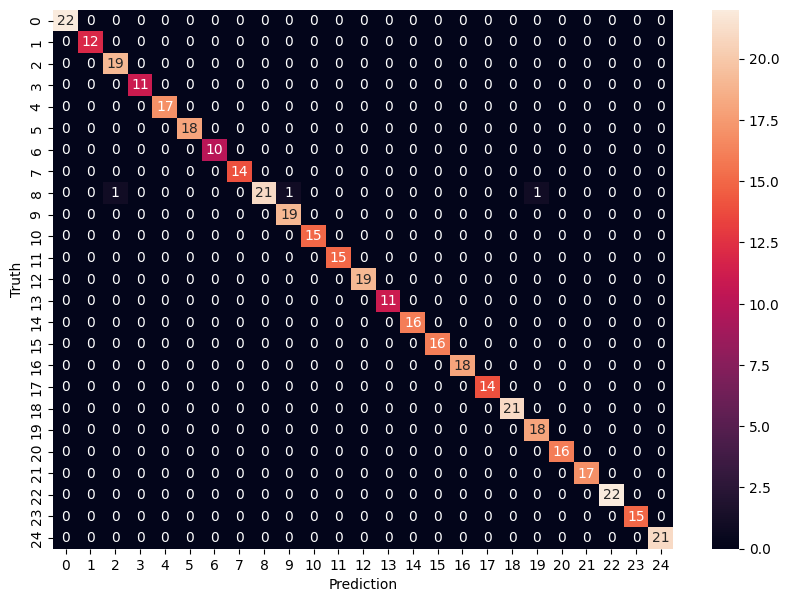

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [36]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))